In [390]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [391]:
import warnings
warnings.filterwarnings('ignore')

Reading Data Set

In [392]:
df=pd.read_csv("Leads.csv")
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [393]:
df.shape

(9240, 37)

In [394]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

Cleaning Data

In [395]:
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [396]:
#Checking the  percentage of Null Values in each column
round(100*(df.isnull().sum()/len(df)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [397]:
#Dropping columns with more then 40% missing values because they will not be helpful for our case study
drop_columns = df.columns[100*(df.isnull().sum()/len(df)) > 40]
print(drop_columns)

Index(['Lead Quality', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score'],
      dtype='object')


In [398]:
df = df.drop(drop_columns, axis=1)

In [399]:
df.shape

(9240, 32)

In [400]:
#Choosing and deleting irrelevant columns for our case study
df.drop(['A free copy of Mastering The Interview','I agree to pay the amount through cheque','Tags','Last Notable Activity','Last Activity'],axis=1,inplace=True)

In [401]:
df.shape

(9240, 27)

Analysing other columns with high null values

In [402]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,No,No,No,Select,Select
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,No,No,No,Select,Select
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,No,No,No,Potential Lead,Mumbai
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,No,No,No,Select,Mumbai
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,No,No,No,Select,Mumbai


In [403]:
round(100*(df.isnull().sum()/len(df)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [404]:
#Country
df['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [405]:
#Dropping City and Country
df.drop(['City', 'Country'],axis=1,inplace=True)

In [406]:
# Deleting the rows, where TotalVisits column is null
df = df[~np.isnan(df['TotalVisits'])]

In [407]:
# Deleting the rows, where Page Views Per Visit column is null
df = df[~np.isnan(df['Page Views Per Visit'])]

In [408]:
df['Specialization'].value_counts()

Select                               1873
Finance Management                    962
Human Resource Management             838
Marketing Management                  824
Operations Management                 500
Business Administration               399
IT Projects Management                366
Supply Chain Management               346
Banking, Investment And Insurance     335
Travel and Tourism                    202
Media and Advertising                 202
International Business                176
Healthcare Management                 157
E-COMMERCE                            111
Hospitality Management                111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

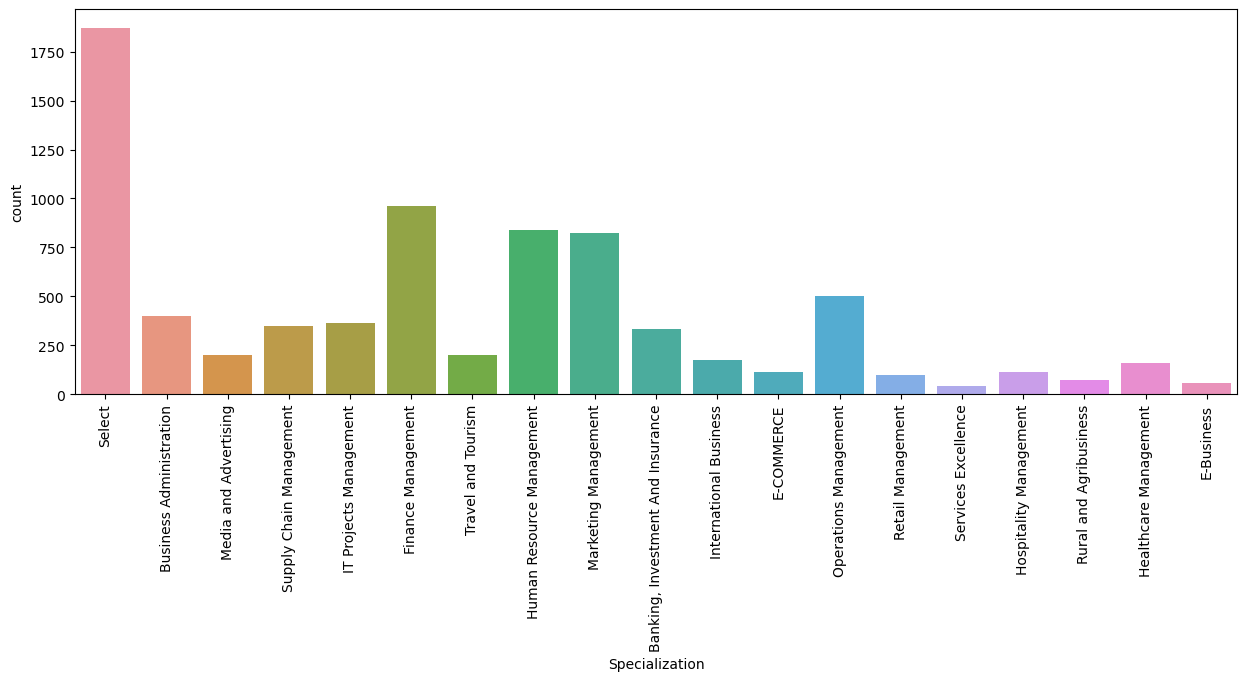

In [409]:
plt.figure(figsize=(15,5))
sns.countplot(x = "Specialization", data = df)
plt.xticks(rotation=90)
plt.show()

In [410]:
# SO we have "Select" and NULL values. Changing NULL to "SELECT"
df['Specialization'].fillna('Select',inplace=True)

In [411]:
df['How did you hear about X Education'].value_counts()


Select                   4914
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               66
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [412]:
#Imputing Missing Data with "SELECT" which is basically no option selected
df['How did you hear about X Education'].fillna('Select',inplace=True)

In [413]:
df['What is your current occupation'].value_counts()

Unemployed              5502
Working Professional     679
Student                  207
Other                     15
Housewife                  9
Businessman                8
Name: What is your current occupation, dtype: int64

In [414]:
#Imputing Missing Data with "Other"
df['What is your current occupation'].fillna('Other',inplace=True)

In [415]:
df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6399
Flexibility & Convenience       1
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [416]:
#Since mostly "Better Career Prospects" is choosen, we will impute NULL with "Better Career Prospects"
df['What matters most to you in choosing a course'].fillna('Better Career Prospects',inplace=True)

In [417]:
#Lead Profile
df['Lead Profile'].value_counts()

Select                         4079
Potential Lead                 1559
Other Leads                     482
Student of SomeSchool           240
Lateral Student                  21
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [418]:
#Imputing NULL values with "SELECT"
df['Lead Profile'].fillna('Select',inplace=True)

In [419]:
round(100*(df.isnull().sum()/len(df)),2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.32
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      0.00
Total Time Spent on Website                      0.00
Page Views Per Visit                             0.00
Specialization                                   0.00
How did you hear about X Education               0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                   

In [420]:
# Checking the value_counts of remaining variables for better data understanding :-

cols=list(df.iloc[:,:])  # Creating list 'cols' of variables


for i in cols:
    print(i,'=====')
    print(df[i].value_counts(), '\n')

Prospect ID =====
7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
51c534e0-8913-468b-9214-6487a55e1fae    1
65954c34-8ce7-4d9b-8ae0-f15f15bc9055    1
e02efa11-5bf6-40ee-9194-75d3fffef1d3    1
297fd0fa-69e5-49cf-b794-94c103e388d7    1
                                       ..
d27ecc9b-9176-47d5-a281-09a48af38749    1
bff6c61d-25e3-4b1e-bf17-b634c91f3e2f    1
c62678c1-e741-4874-b5cf-500b2e8e2a78    1
4e859886-6ae2-462b-abd0-1df6ae65d8bf    1
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    1
Name: Prospect ID, Length: 9103, dtype: int64 

Lead Number =====
660737    1
602419    1
602453    1
602451    1
602442    1
         ..
630127    1
630128    1
630135    1
630139    1
579533    1
Name: Lead Number, Length: 9103, dtype: int64 

Lead Origin =====
Landing Page Submission    4886
API                        3578
Lead Add Form               608
Lead Import                  31
Name: Lead Origin, dtype: int64 

Lead Source =====
Google               2868
Direct Traffic       2543
Olark Chat           175

As we notice that, from the value counts of all the columns, there were a few columns in which only one value was majorly present for all the data points. These include Do Not Call, Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations, Receive More Updates About Our Courses, Update me on Supply Chain Content, Get updates on DM Content. Since practically all of the values for these variables are No, it's best that we drop these columns as they won't help with our analysis.
'Do Not Call' Yes count = 2
'Search' Yes count = 13
'Magazine' Yes count= 0
'Newspaper Article' Yes = 1
'X Education Forums' Yes = 0
'Newspaper' Yes = 1
'Digital Advertisement' Yes = 3
'Through Recommendations' Yes = 6
'Receive More Updates About Our Courses' Yes = 0
'Update me on Supply Chain Content' Yes = 0
'Get updates on DM Content' Yes = 0

In [421]:
df.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
            'Update me on Supply Chain Content', 'Get updates on DM Content'], axis = 1, inplace = True)

In [422]:
df.drop(['Lead Profile', 'How did you hear about X Education', 'What matters most to you in choosing a course'], axis = 1, inplace = True)

In [423]:
#We can drop Prospect ID, and only keep Lead Number
df.drop(['Prospect ID'],1,inplace=True)

Data Analysis

From the problem statement 'Converted' is our target variable.

0: Not converted into lead.
1: Successfully converted.

In [424]:
df.Converted.value_counts()

0    5642
1    3461
Name: Converted, dtype: int64

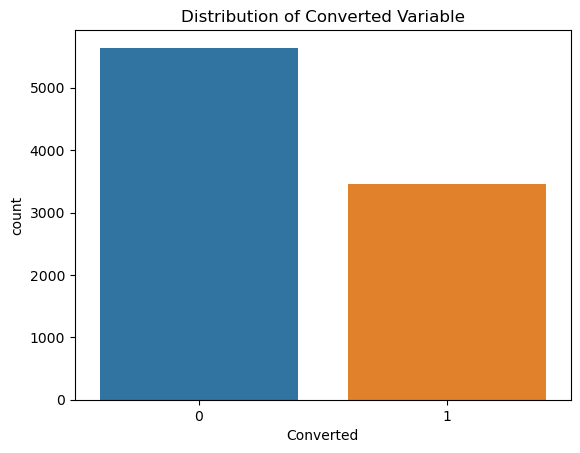

In [425]:
#Plotting count plot to get clear view of data distribution of 'Converted' column:-

sns.countplot(x= "Converted", data = df)
plt.title("Distribution of Converted Variable")
plt.show()

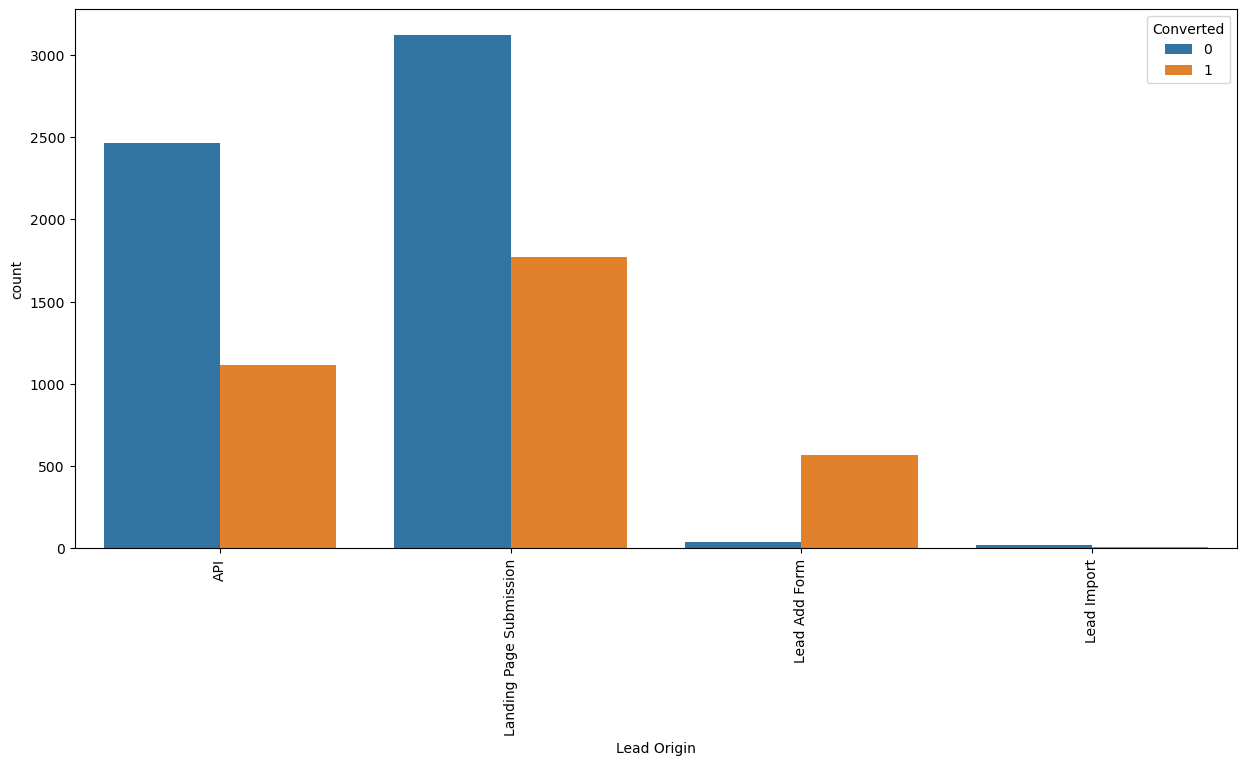

In [426]:
#Plotting 'Lead Origin' with 'Converted'
plt.figure(figsize=(15,7))
s1=sns.countplot(x = "Lead Origin", hue = "Converted", data = df)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

Findings:
Conversion rate for 'API' and Landing Page Submission is above 30% 
For 'Lead Add Form' number of conversion is more than unsuccessful conversion.
Count of 'Lead Import' is lesser.

Analysis:
To improve overall lead conversion rate, we need to focus more on improving lead conversion of API and Landing Page Submission origin and generate more leads from Lead Add Form

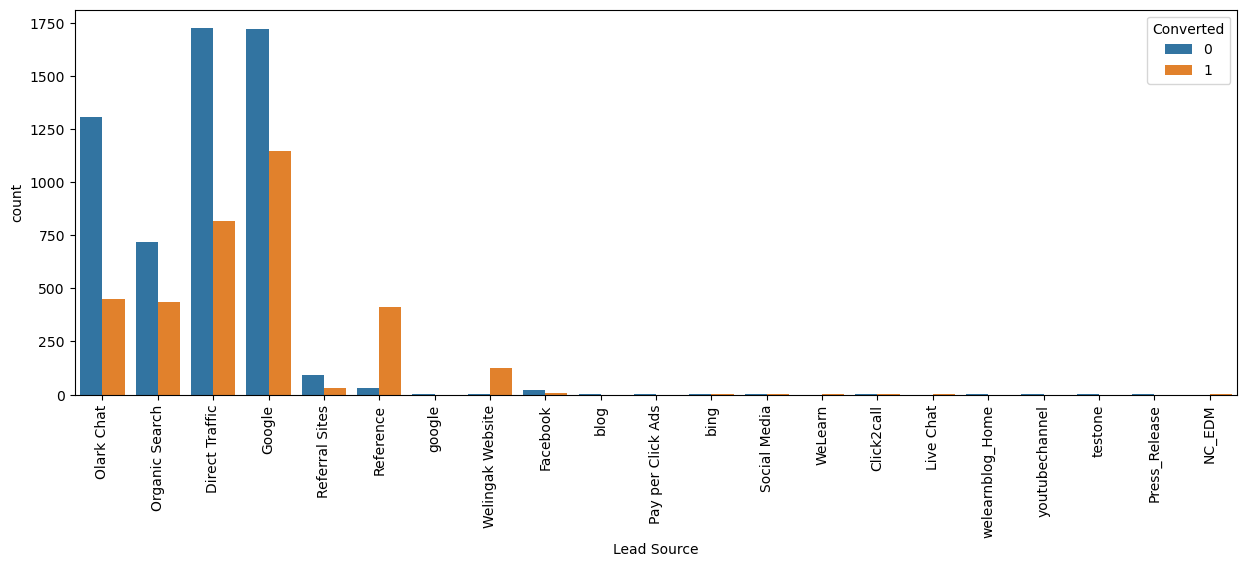

In [427]:
#Plotting 'Lead Source' with 'Converted'

plt.figure(figsize = (15,5))
s2=sns.countplot(x = "Lead Source", hue = "Converted", data = df)
s2.set_xticklabels(s2.get_xticklabels(),rotation=90)
plt.show()

Findings:
Google and Direct traffic generates maximum number of leads.
Conversion rate of 'Reference' and 'Welingak Website' leads is high.

Analysis:
To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.

Bivariate Analysis

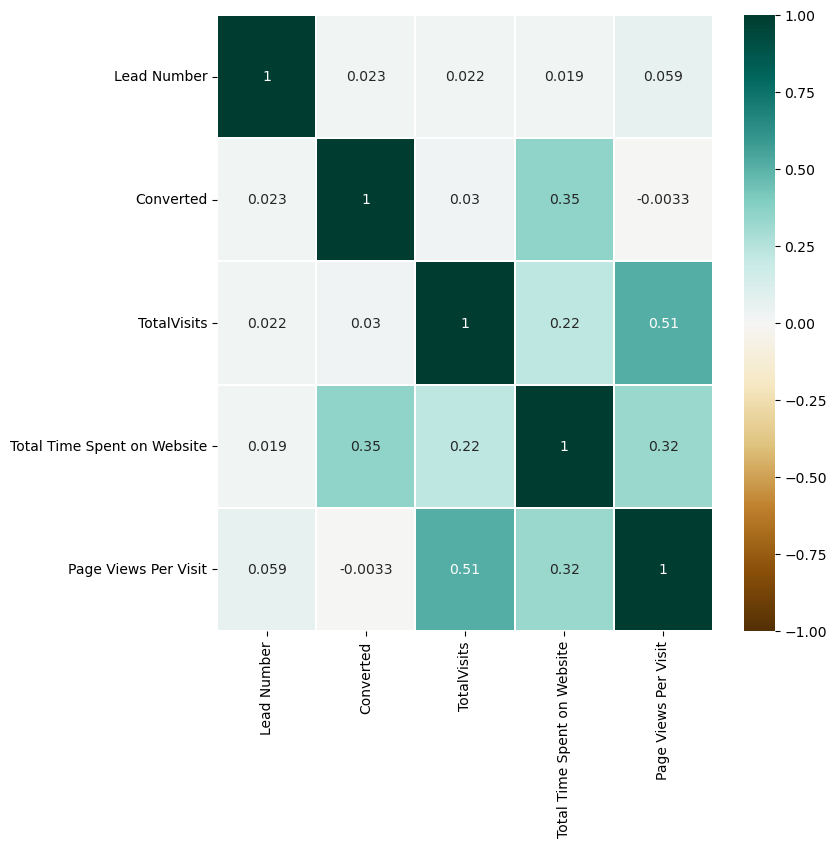

In [428]:
# Observing Correlation
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True,cmap="BrBG", robust=True,linewidth=0.1, vmin=-1 )
plt.show()

Dummy Variable creation

In [429]:
temp = df.loc[:, df.dtypes == 'object']
temp.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Specialization',
       'What is your current occupation'],
      dtype='object')

In [430]:
# Create dummy variables
dummy1 = pd.get_dummies(df[['Lead Origin', 'Lead Source', 'Do Not Email', 'What is your current occupation']], drop_first=True)

# Add the results to the master dataframe
df = pd.concat([df, dummy1], axis=1)

In [431]:
# Demo Cell
dummy = pd.DataFrame({'P': ['p', 'q', 'p']})
dummy

,P
0,p
1,q
2,p


In [432]:
pd.get_dummies(dummy)


,P_p,P_q
0,1,0
1,0,1
2,1,0


In [433]:
pd.get_dummies(dummy, prefix=['col1'])

,col1_p,col1_q
0,1,0
1,0,1
2,1,0


In [434]:
# Creating dummy variable separately for the variable 'Specialization' since it has the level 'Select' which is useless so we drop that level by specifying it explicitly

dummy_spl = pd.get_dummies(df['Specialization'], prefix = 'Specialization')
dummy_spl = dummy_spl.drop(['Specialization_Select'], 1)
df = pd.concat([df, dummy_spl], axis = 1)

In [435]:
df = df.drop(['Specialization','Lead Origin', 'Lead Source', 'Do Not Email', 'What is your current occupation'],1)

Test-Train Split

In [436]:
df.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,660737,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,660728,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,660727,1,2.0,1532,2.0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,660719,0,1.0,305,1.0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,660681,1,2.0,1428,1.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [437]:
from sklearn.model_selection import train_test_split


In [438]:
x = df.drop(['Lead Number', 'Converted'], axis =1)
x.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [439]:
y = df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [440]:
# Splitting data into train and test set with 70:30 ratio
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=100)

In [441]:
print("x_train Size", x_train.shape)
print("y_train Size", y_train.shape)

x_train Size (6372, 50)
y_train Size (6372,)


Scaling

In [442]:
from sklearn.preprocessing import StandardScaler

In [443]:
scaler = StandardScaler()
x_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(x_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

x_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
7962,-0.092900,1.476324,-0.394072,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
5520,0.695064,-0.771066,2.111481,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1962,0.301082,-0.571257,0.061483,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1566,2.074000,1.393834,0.517039,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
9170,-0.683873,-0.881052,-1.077404,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Correlation

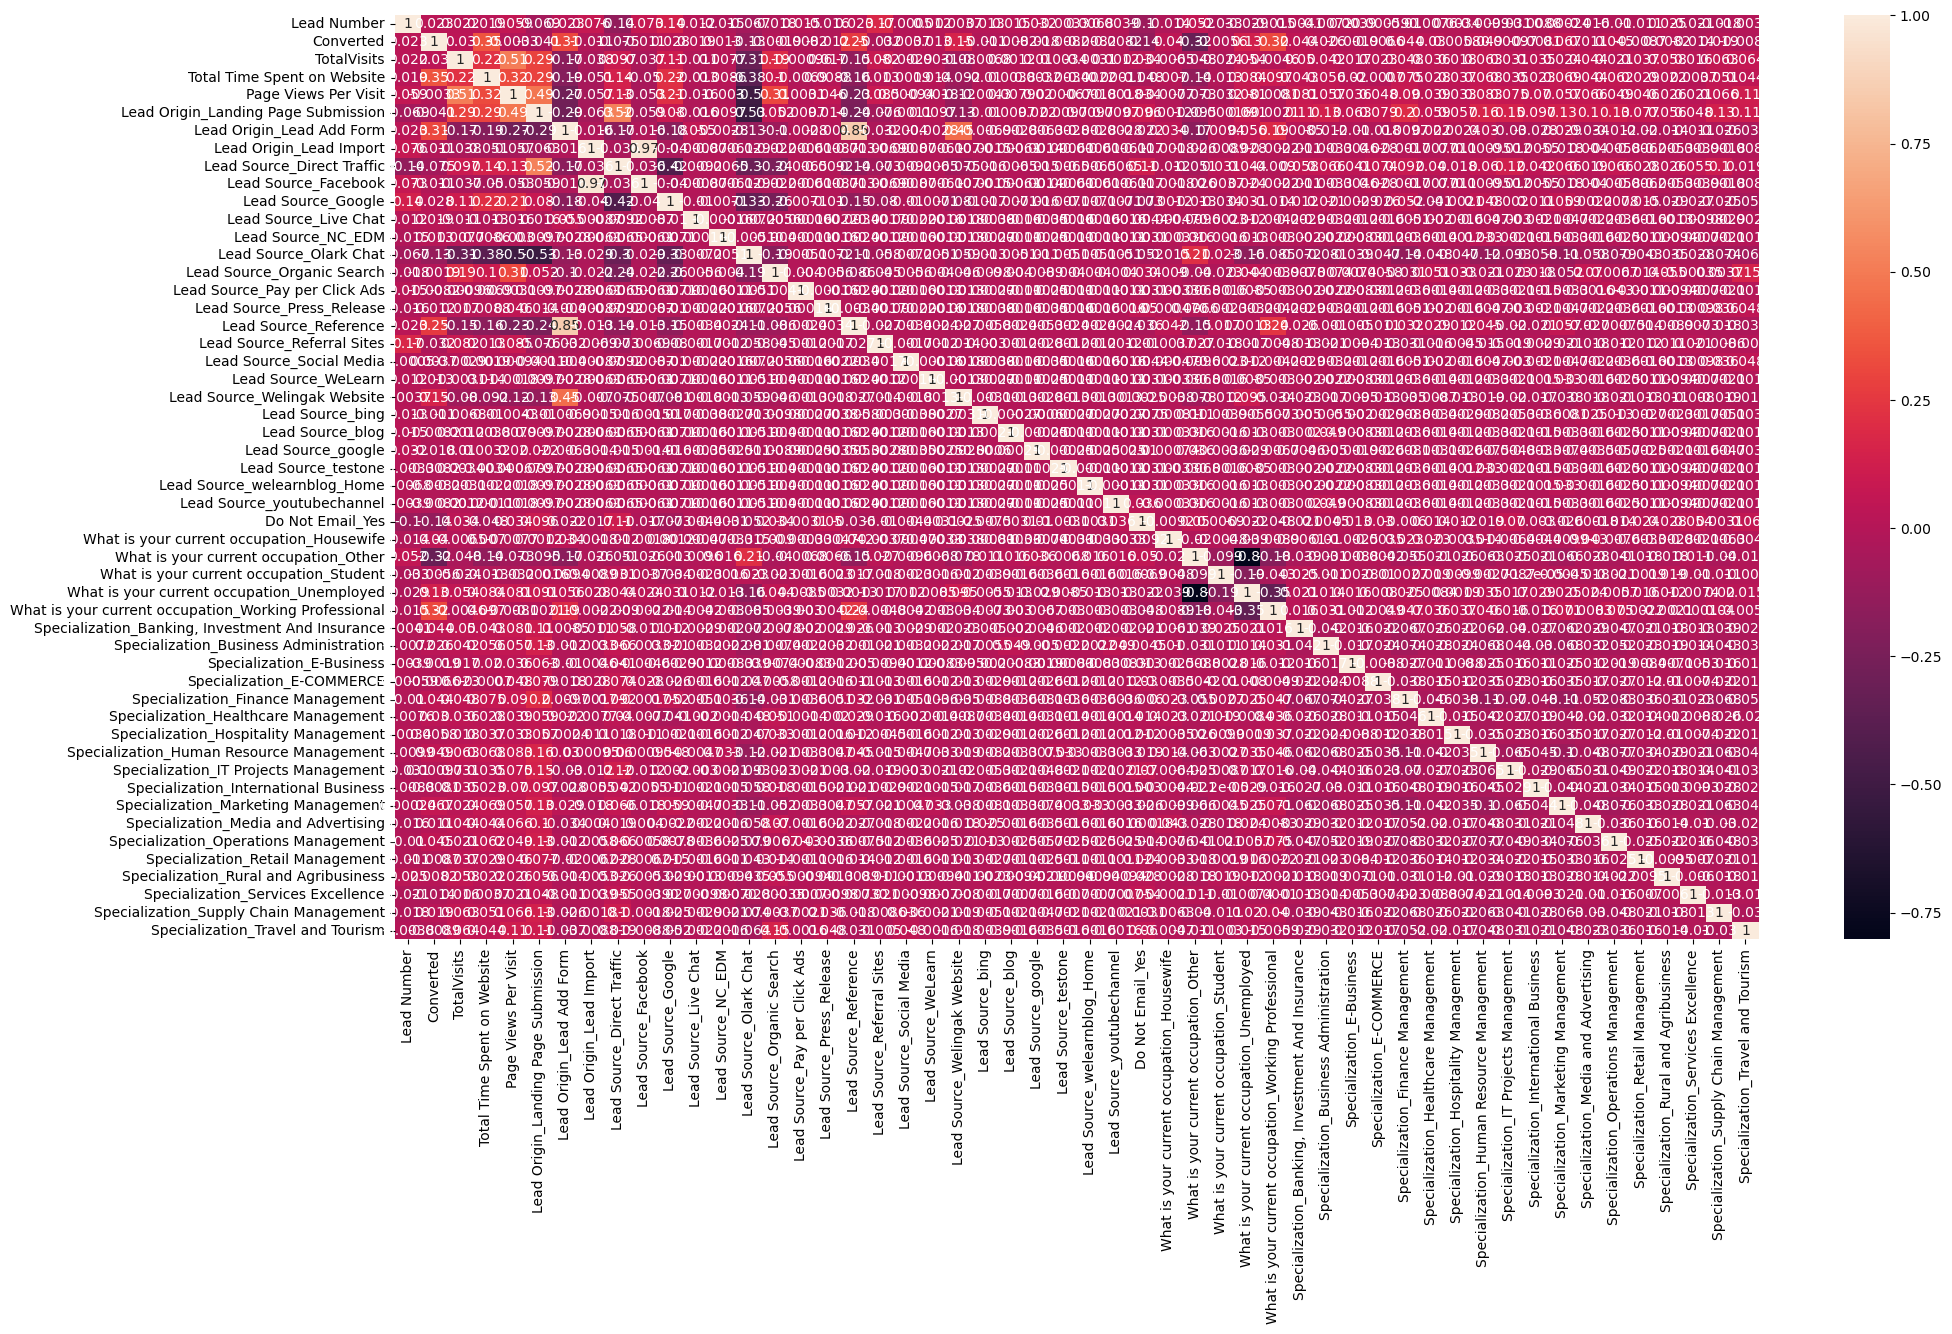

In [444]:
plt.figure(figsize=(22,12))
sns.heatmap(df.corr(), annot=True)
plt.show()

Model Building

In [445]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [446]:
# Importing the 'RFE' and selecting 15 variables

from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=15)
rfe = rfe.fit(x_train, y_train)

In [447]:
list(zip(x_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 29),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 34),
 ('Lead Origin_Landing Page Submission', False, 17),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 28),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 32),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Live Chat', False, 24),
 ('Lead Source_NC_EDM', False, 18),
 ('Lead Source_Olark Chat', False, 22),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Pay per Click Ads', False, 23),
 ('Lead Source_Press_Release', False, 36),
 ('Lead Source_Reference', False, 30),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', False, 35),
 ('Lead Source_WeLearn', False, 26),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', True, 1),
 ('Lead Source_blog', False, 25),
 ('Lead Source_google', True, 1),
 ('Lead Source_testone', False, 21),
 ('Lead Source_welearnblog_Home', False, 27),
 ('Lead

In [448]:
col = x_train.columns[rfe.support_]


Now we have all the variables selected by RFE. let's use these variables to create a logistic regression model using statsmodels.

In [449]:
x_train = x_train[col]

In [451]:
import statsmodels.api as sm
x_train_sm = sm.add_constant(x_train)
logm2 = sm.GLM(y_train, x_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6356
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2859.9
Date:                Sun, 17 Dec 2023   Deviance:                       5719.8
Time:                        09:34:08   Pearson chi2:                 6.38e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3496
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1812      0.084      2.166      0.030       0.017       0.345
Total Time Spent on Website                              1.1070      0.039     28.690      0.000       1.031       1.183
Lead Origin_Lead Add Form                                2.8832      0.225     12.838      0.000       2.443       3.323
Lead Source_Direct Traffic                              -1.0860      0.108    -10.053      0.000      -1.298      -0.874
Lead Source_Google                                      -0.8079      0.103     -7.827      0.000      -1.010      -0.606
Lead Source_Organic Search                              -0.9018      0.124     -7.256      0.000      -1.145      -0.658
Lead Source_Referral Sites                              -1.3907      0.336     -4.137      0.000      -2.050      -0.732
Lead Source_Welingak Website                             2.0007      0.749      2.671      0.008       0.532       3.469
Lead Source_bing                                       -21.6941   2.38e+04     -0.001      0.999   -4.67e+04    4.67e+04
Lead Source_google                                     -22.0953   2.56e+04     -0.001      0.999   -5.01e+04    5.01e+04
Do Not Email_Yes                                        -1.3274      0.159     -8.371      0.000      -1.638      -1.017
What is your current occupation_Housewife               22.5838    1.6e+04      0.001      0.999   -3.13e+04    3.14e+04
What is your current occupation_Other                   -1.2872      0.083    -15.572      0.000      -1.449      -1.125
What is your current occupation_Working Professional     2.5064      0.178     14.093      0.000       2.158       2.855
Specialization_E-Business                                0.6002      0.389      1.545      0.122      -0.161       1.362
Specialization_Services Excellence                       0.8241      0.551      1.495      0.135      -0.256       1.904
========================================================================================================================
"""

Checking VIF

In [453]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train[col].columns
vif['VIF'] = [variance_inflation_factor(x_train[col].values, i) for i in range(x_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,1.44
11,What is your current occupation_Other,1.33
6,Lead Source_Welingak Website,1.32
3,Lead Source_Google,1.24
2,Lead Source_Direct Traffic,1.22
0,Total Time Spent on Website,1.19
12,What is your current occupation_Working Profes...,1.15
9,Do Not Email_Yes,1.12
4,Lead Source_Organic Search,1.08
5,Lead Source_Referral Sites,1.01


In [457]:
# Getting the predicted value on the train set
y_train_pred = res.predict(x_train_sm)
y_train_pred.head()

7962    0.732541
5520    0.146996
1962    0.221135
1566    0.968405
9170    0.311285
dtype: float64

In [458]:
#Creating a dataframe with the actual converted and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred.values})
# Assigning Customer ID for each records
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,CustID
0,0,0.732541,7962
1,0,0.146996,5520
2,0,0.221135,1962
3,1,0.968405,1566
4,0,0.311285,9170


In [460]:
# Creating new column 'Predicted' with 1 if Paid_Prob > 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()


,Converted,Converted_Prob,CustID,Predicted
0,0,0.732541,7962,1
1,0,0.146996,5520,0
2,0,0.221135,1962,0
3,1,0.968405,1566,1
4,0,0.311285,9170,0


Creating the Confusion matrix


In [462]:
from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3551  402]
 [ 847 1572]]


In [463]:
# Let's check the overall accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8039861895794099


In [464]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [468]:
# Calculating the 'Sensitivity'
TP/(TP+FN)

0.6498553121124432

In [466]:
# Calculating the 'specificity'

TN/(TN+FP)

0.8983050847457628

Finding the Optimal Cutoff
Now 0.5 was just arbitrary to loosely check the model performace. But in order to get good results, you need to optimise the threshold. So first let's plot an ROC curve to see what AUC we get.

In [467]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [470]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )


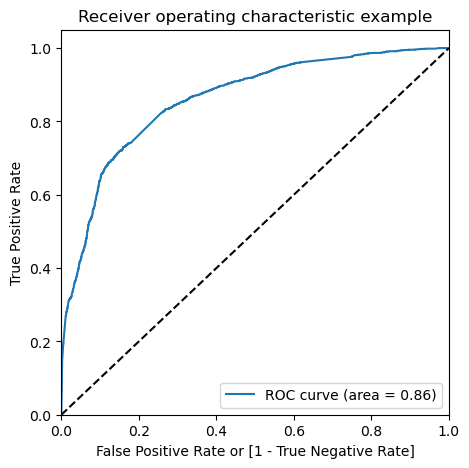

In [479]:
draw_roc(y_train_pred_final['Converted'], y_train_pred_final['Converted_Prob'])

We can see from the ROC curve, that the area of the curve is 0.86

In [471]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,CustID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.732541,7962,1,1,1,1,1,1,1,1,1,0,0
1,0,0.146996,5520,0,1,1,0,0,0,0,0,0,0,0
2,0,0.221135,1962,0,1,1,1,0,0,0,0,0,0,0
3,1,0.968405,1566,1,1,1,1,1,1,1,1,1,1,1
4,0,0.311285,9170,0,1,1,1,1,0,0,0,0,0,0


In [473]:
cutoff_df = pd.DataFrame(columns=['prob','accuracy','sensi','speci'])
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.379630  1.000000  0.000000
0.1   0.1  0.516949  0.981811  0.232482
0.2   0.2  0.692875  0.905333  0.562864
0.3   0.3  0.770088  0.832162  0.732102
0.4   0.4  0.802731  0.700703  0.865166
0.5   0.5  0.803986  0.649855  0.898305
0.6   0.6  0.782800  0.565110  0.916013
0.7   0.7  0.759102  0.466722  0.938022
0.8   0.8  0.735091  0.356346  0.966861
0.9   0.9  0.689893  0.190988  0.995194


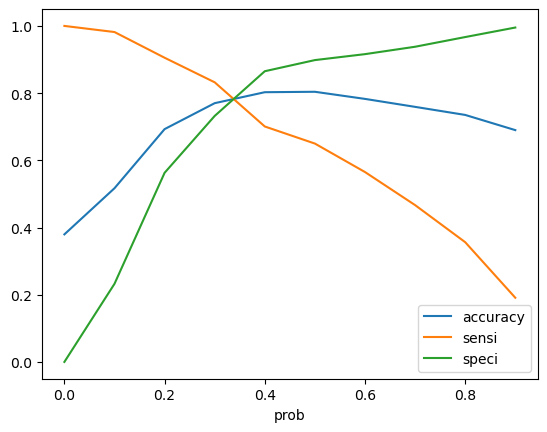

In [474]:
# Plotting accuracy, sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

At point 0.32 where the three parameters cut each other, we can see that there is a balance bethween sensitivity and specificity with a good accuracy.

So, 0.32 may be the optimal cutoff.

In [475]:
# Creating a column with name "predicted", which is the predicted value for 0.35 cutoff 
y_train_pred_final['predicted'] = y_train_pred_final['Converted_Prob'].map(lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,CustID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted
0,0,0.732541,7962,1,1,1,1,1,1,1,1,1,0,0,1
1,0,0.146996,5520,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.221135,1962,0,1,1,1,0,0,0,0,0,0,0,0
3,1,0.968405,1566,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.311285,9170,0,1,1,1,1,0,0,0,0,0,0,0


Creating Lead Score

Creating a column called Lead Score by multplying the converted probablity with 100.

Lead Score = (Converted_Prob) X 100

In [476]:
# Creating Lead Score column
y_train_pred_final['Lead Score'] = round((y_train_pred_final['Converted_Prob']*100))
y_train_pred_final.head()

,Converted,Converted_Prob,CustID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted,Lead Score
0,0,0.732541,7962,1,1,1,1,1,1,1,1,1,0,0,1,73.0
1,0,0.146996,5520,0,1,1,0,0,0,0,0,0,0,0,0,15.0
2,0,0.221135,1962,0,1,1,1,0,0,0,0,0,0,0,0,22.0
3,1,0.968405,1566,1,1,1,1,1,1,1,1,1,1,1,1,97.0
4,0,0.311285,9170,0,1,1,1,1,0,0,0,0,0,0,0,31.0


The customers with Lead Score more than 32 will be converted as we decided to have the optimal probablity cutoff is 0.32

Higher the Lead Score, higher the chance of the customers to be converted.

Finding the average Lead Score of the predicted converted leads


In [477]:
# Creating dataframe for predicted converted leads
y_train_pred_converted = y_train_pred_final[y_train_pred_final['predicted']==1]
y_train_pred_converted.head()

,Converted,Converted_Prob,CustID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted,Lead Score
0,0,0.732541,7962,1,1,1,1,1,1,1,1,1,0,0,1,73.0
3,1,0.968405,1566,1,1,1,1,1,1,1,1,1,1,1,1,97.0
9,1,0.647439,1050,1,1,1,1,1,1,1,1,0,0,0,1,65.0
21,1,0.351008,6807,0,1,1,1,1,0,0,0,0,0,0,1,35.0
25,1,0.614859,7876,1,1,1,1,1,1,1,1,0,0,0,1,61.0


In [478]:
# Average Lead Score of the predicted converted leads
avg_converted = round(sum(y_train_pred_converted['Lead Score'])/len(y_train_pred_converted.index))
avg_converted

73

the average Lead Score of the customers, who were converted is 73.